## Imports and Setup

In [32]:
from helper_functions_wine import pd, os, shutil
from helper_functions_wine import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [33]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              9.3.0


## Data Loading and Cleaning

In [34]:
# FIXME - update the filename to point to your dataset
filename = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/csv/winequality-red.csv"
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [35]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [37]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'quality'
df = add_id_column(df, classification_id) #changed function to deal with int values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5-1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,5-2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,5-3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,6-1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,5-680
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6-636
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,6-637
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,5-681


In [38]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (1599, 11)
Y (1599,)
This value should be True: True


## Image Generation

In [39]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 1599 samples to binary: 6.279149055480957 seconds. Seconds per sample = 0.003926922486229492


## Place Folders into the Correct Categories

In [41]:
organize_photos_in_folders(image_directory, Y)

1599
{'5': 681, '6': 638, '7': 199, '4': 53, '8': 18, '3': 10}


In [42]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [43]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [44]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 6
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 100
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [45]:
#Changed values to tune for results
#In resnet.py -> get_callbacks() -> patiences to stop=35 & patience to reduce lr=25
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 1282 images belonging to 6 classes.
Found 317 images belonging to 6 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
 2/13 [===>..........................] - ETA: 13s - loss: 2.4117 - acc: 0.1593 - f1_m: 0.1134 - precision_m: 0.1887 - recall_m: 0.0811 - auc_10: 0.5493 - false_negatives_10: 166.0000 - false_positives_10: 62.0000 - true_negatives_10: 848.0000 - true_positives_10: 16.0000 - mean_absolute_error: 0.2713 - mean_squared_error: 0.1668

Exception ignored in: <function _EagerDefinedFunctionDeleter.__del__ at 0x000001FB0E7443A0>
Traceback (most recent call last):
  File "c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\tensorflow\python\eager\function.py", line 406, in __del__
    context.remove_function(self.name)
  File "c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\tensorflow\python\eager\context.py", line 2516, in remove_function
    context().remove_function(name)
KeyboardInterrupt: 


13/13 [==============================] - ETA: 0s - loss: 1.7212 - acc: 0.3573 - f1_m: 0.2719 - precision_m: 0.3631 - recall_m: 0.2248 - auc_10: 0.7645 - false_negatives_10: 990.0000 - false_positives_10: 482.0000 - true_negatives_10: 5928.0000 - true_positives_10: 292.0000 - mean_absolute_error: 0.2253 - mean_squared_error: 0.1359

In [29]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.022042004484683277, 'acc': 0.9931357264518738, 'f1_m': 0.9930394053459167, 'precision_m': 0.9933618426322937, 'recall_m': 0.9927204489707947, 'auc_5': 0.9990831613540649, 'false_negatives_5': 9.0, 'false_positives_5': 7.0, 'true_negatives_5': 6403.0, 'true_positives_5': 1273.0, 'mean_absolute_error': 0.0033008428232278674, 'mean_squared_error': 0.0017668114072876052, 'val_loss': 4.121420240402221, 'val_acc': 0.44858044385910034, 'val_f1_m': 0.4543117105960846, 'val_precision_m': 0.4575932383537292, 'val_recall_m': 0.45114704966545105, 'val_auc_5': 0.7252814173698425, 'val_false_negatives_5': 181.0, 'val_false_positives_5': 176.0, 'val_true_negatives_5': 1409.0, 'val_true_positives_5': 136.0, 'val_mean_absolute_error': 0.18494586646556854, 'val_mean_squared_error': 0.16718987822532655, 'lr': 0.009999999776482582}


In [30]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.044436514377593994, 'acc': 0.9875195026397705, 'f1_m': 0.9873545169830322, 'precision_m': 0.987354576587677, 'recall_m': 0.987354576587677, 'auc_6': 0.9989482164382935, 'false_negatives_6': 16.0, 'false_positives_6': 16.0, 'true_negatives_6': 6394.0, 'true_positives_6': 1266.0, 'mean_absolute_error': 0.00574774295091629, 'mean_squared_error': 0.003558170748874545, 'val_loss': 3.644383668899536, 'val_acc': 0.5362775921821594, 'val_f1_m': 0.5478125810623169, 'val_precision_m': 0.5485739707946777, 'val_recall_m': 0.5470588207244873, 'val_auc_6': 0.7632954120635986, 'val_false_negatives_6': 147.0, 'val_false_positives_6': 146.0, 'val_true_negatives_6': 1439.0, 'val_true_positives_6': 170.0, 'val_mean_absolute_error': 0.15595842897891998, 'val_mean_squared_error': 0.1430530697107315, 'lr': 0.01}


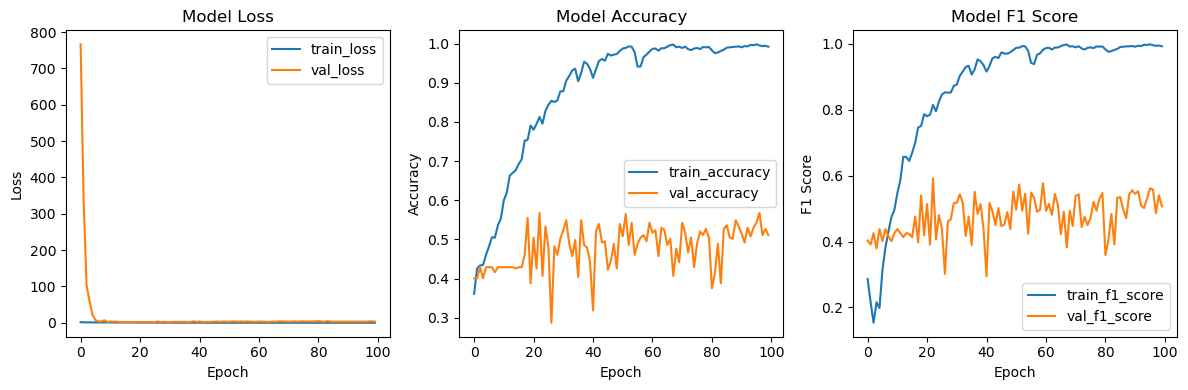

In [17]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [31]:
#FIXME - update the directories to point where you would like
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-correlated"
new_dir = image_directory + '/data/'

In [19]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: quality, 13, [5 6 7 4 8 3]


In [20]:
correlated_df = df.reindex(columns=correlated_order)

In [21]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (1599, 11)
Y (1599,)
This value should be True: True


In [22]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
#image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 1599 samples to binary: 4.742600440979004 seconds. Seconds per sample = 0.002965979012494687


In [24]:
organize_photos_in_folders(image_directory, Y)

1599
{'5': 681, '6': 638, '7': 199, '4': 53, '8': 18, '3': 10}


In [25]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 1282 images belonging to 6 classes.
Found 317 images belonging to 6 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
13/13 [==============================] - 21s 1s/step - loss: 1.7407 - acc: 0.3682 - f1_m: 0.2607 - precision_m: 0.3481 - recall_m: 0.2115 - auc_5: 0.7592 - false_negatives_5: 1011.0000 - false_positives_5: 491.0000 - true_negatives_5: 5919.0000 - true_positives_5: 271.0000 - mean_absolute_error: 0.2273 - mean_squared_error: 0.1360 - val_loss: 107161.5547 - val_acc: 0.4006 - val_f1_m: 0.4029 - val_precision_m: 0.4029 - val_recall_m: 0.4029 - val_auc_5: 0.6404 - val_false_negatives_5: 190.0000 - val_false_positives_5: 190.0000 - val_true_negatives_5: 1395.0000 - val_true_positives_5: 127.0000 - val_mean_absolute_error: 0.1998 - val_mean_squared_error: 0.1998

Epoch 00001: val_acc improved from -inf to 0.40063, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.40.hdf5
Epoch 2/100
13/13 [==============================] - 1s 97ms/step - loss: 1.2686 - acc: 0.4103

In [26]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.022042004484683277, 'acc': 0.9931357264518738, 'f1_m': 0.9930394053459167, 'precision_m': 0.9933618426322937, 'recall_m': 0.9927204489707947, 'auc_5': 0.9990831613540649, 'false_negatives_5': 9.0, 'false_positives_5': 7.0, 'true_negatives_5': 6403.0, 'true_positives_5': 1273.0, 'mean_absolute_error': 0.0033008428232278674, 'mean_squared_error': 0.0017668114072876052, 'val_loss': 4.121420240402221, 'val_acc': 0.44858044385910034, 'val_f1_m': 0.4543117105960846, 'val_precision_m': 0.4575932383537292, 'val_recall_m': 0.45114704966545105, 'val_auc_5': 0.7252814173698425, 'val_false_negatives_5': 181.0, 'val_false_positives_5': 176.0, 'val_true_negatives_5': 1409.0, 'val_true_positives_5': 136.0, 'val_mean_absolute_error': 0.18494586646556854, 'val_mean_squared_error': 0.16718987822532655, 'lr': 0.009999999776482582}


In [27]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.044436514377593994, 'acc': 0.9875195026397705, 'f1_m': 0.9873545169830322, 'precision_m': 0.987354576587677, 'recall_m': 0.987354576587677, 'auc_6': 0.9989482164382935, 'false_negatives_6': 16.0, 'false_positives_6': 16.0, 'true_negatives_6': 6394.0, 'true_positives_6': 1266.0, 'mean_absolute_error': 0.00574774295091629, 'mean_squared_error': 0.003558170748874545, 'val_loss': 3.644383668899536, 'val_acc': 0.5362775921821594, 'val_f1_m': 0.5478125810623169, 'val_precision_m': 0.5485739707946777, 'val_recall_m': 0.5470588207244873, 'val_auc_6': 0.7632954120635986, 'val_false_negatives_6': 147.0, 'val_false_positives_6': 146.0, 'val_true_negatives_6': 1439.0, 'val_true_positives_6': 170.0, 'val_mean_absolute_error': 0.15595842897891998, 'val_mean_squared_error': 0.1430530697107315, 'lr': 0.01}


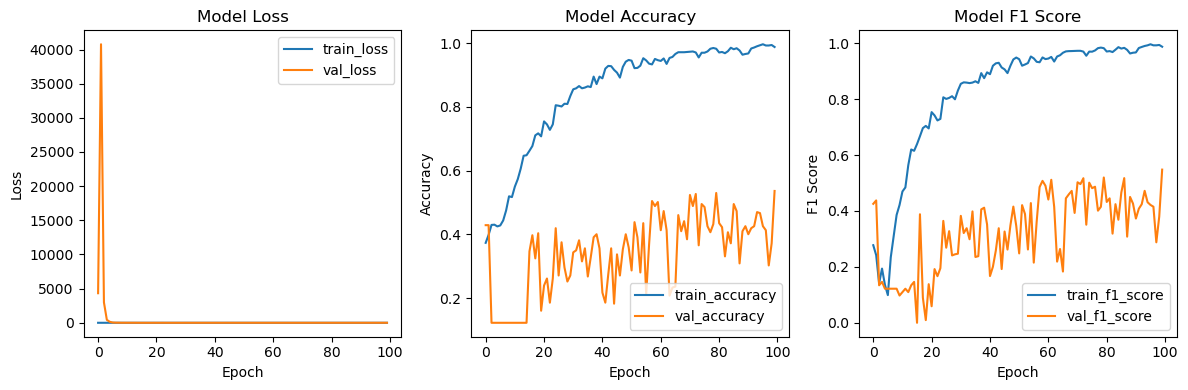

In [28]:
plot_metrics(best_model.history)

# TEST (to be implemented)